[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/13_Activation_Functions_Classification_FashionMNIST.ipynb)

# 13 Comparison of Different Activation Functions Using FashionMNIST


## 1. Introduction to the Dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes

Labels:


*   0 : T-shirt/top
*   1 : Trouser
*   2 : Pullover
*   3 : Dress
*   4 : Coat
*   5 : Sandal
*   6 : Shirt
*   7 : Sneake
*   8 : Bag
*   9 : Ankle Boot











## 2. Data Preprocessing

In [3]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [4]:
from keras.datasets import fashion_mnist
(X_train,y_train),(X_val,y_val) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [0]:
num_classes = 10
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
y_train = to_categorical(y_train,num_classes)
y_val = to_categorical(y_val, num_classes)

In [9]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_val /= 255
X_train.shape, X_val.shape,y_train.shape, y_val.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

## 3. Building the Neural Network

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LeakyReLU, PReLU
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.layers.normalization import BatchNormalization

In [0]:
batch_size = 256
epochs = 100
input_shape = (img_rows, img_cols, 1)
num_classes = 10

### 3.1 Using Sigmoid Function

In [12]:
model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=(3,3), activation='sigmoid',
                   kernel_initializer='he_normal',input_shape=input_shape))
model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(0.25))
model_1.add(Conv2D(64, (3,3), activation='sigmoid'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))
model_1.add(Conv2D(128,(3,3), activation='sigmoid'))
model_1.add(Dropout(0.4))
model_1.add(Flatten())
model_1.add(Dense(128, activation='sigmoid'))
model_1.add(Dropout(0.3))
model_1.add(Dense(num_classes,activation='softmax'))
  
model_1.compile(loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])


model_1_history = model_1.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 7s - loss: 1.6024 - acc: 0.4026 - val_loss: 0.8010 - val_acc: 0.7054
Epoch 2/100
 - 5s - loss: 0.7800 - acc: 0.7071 - val_loss: 0.6776 - val_acc: 0.7382
Epoch 3/100
 - 5s - loss: 0.6904 - acc: 0.7377 - val_loss: 0.6260 - val_acc: 0.7598
Epoch 4/100
 - 5s - loss: 0.6361 - acc: 0.7549 - val_loss: 0.5861 - val_acc: 0.7732
Epoch 5/100
 - 5s - loss: 0.5975 - acc: 0.7702 - val_loss: 0.5526 - val_acc: 0.7865
Epoch 6/100
 - 5s - loss: 0.5674 - acc: 0.7815 - val_loss: 0.5239 - val_acc: 0.7998
Epoch 7/100
 - 5s - loss: 0.5423 - acc: 0.7926 - val_loss: 0.5048 - val_acc: 0.8055
Epoch 8/100
 - 5s - loss: 0.5290 - acc: 0.7985 - val_loss: 0.4833 - val_acc: 0.8187
Epoch 9/100
 - 5s - loss: 0.5071 - acc: 0.8071 - val_loss: 0.4762 - val_acc: 0.8153
Epoch 10/100
 - 5s - loss: 0.4961 - acc: 0.8112 - val_loss: 0.4573 - val_acc: 0.8250
Epoch 11/100
 - 5s - loss: 0.4829 - acc: 0.8165 - val_loss: 0.4500 - val_acc: 0.8318
Epoch 12/100
 - 5s - los

 - 5s - loss: 0.3533 - acc: 0.8664 - val_loss: 0.3473 - val_acc: 0.8688
Epoch 35/100
 - 5s - loss: 0.3522 - acc: 0.8683 - val_loss: 0.3393 - val_acc: 0.8710
Epoch 36/100
 - 5s - loss: 0.3492 - acc: 0.8673 - val_loss: 0.3328 - val_acc: 0.8731
Epoch 37/100
 - 5s - loss: 0.3437 - acc: 0.8700 - val_loss: 0.3431 - val_acc: 0.8697
Epoch 38/100
 - 5s - loss: 0.3429 - acc: 0.8693 - val_loss: 0.3419 - val_acc: 0.8683
Epoch 39/100
 - 5s - loss: 0.3401 - acc: 0.8712 - val_loss: 0.3294 - val_acc: 0.8730
Epoch 40/100
 - 5s - loss: 0.3363 - acc: 0.8725 - val_loss: 0.3339 - val_acc: 0.8710
Epoch 41/100
 - 5s - loss: 0.3362 - acc: 0.8722 - val_loss: 0.3216 - val_acc: 0.8783
Epoch 42/100
 - 5s - loss: 0.3308 - acc: 0.8747 - val_loss: 0.3245 - val_acc: 0.8762
Epoch 43/100
 - 5s - loss: 0.3308 - acc: 0.8737 - val_loss: 0.3245 - val_acc: 0.8776
Epoch 44/100
 - 5s - loss: 0.3277 - acc: 0.8764 - val_loss: 0.3220 - val_acc: 0.8749
Epoch 45/100
 - 5s - loss: 0.3267 - acc: 0.8768 - val_loss: 0.3178 - val_acc: 

Epoch 68/100
 - 5s - loss: 0.2912 - acc: 0.8896 - val_loss: 0.2908 - val_acc: 0.8910
Epoch 69/100
 - 5s - loss: 0.2865 - acc: 0.8915 - val_loss: 0.2932 - val_acc: 0.8909
Epoch 70/100
 - 5s - loss: 0.2866 - acc: 0.8905 - val_loss: 0.2882 - val_acc: 0.8910
Epoch 71/100
 - 5s - loss: 0.2839 - acc: 0.8930 - val_loss: 0.2885 - val_acc: 0.8912
Epoch 72/100
 - 5s - loss: 0.2816 - acc: 0.8930 - val_loss: 0.2899 - val_acc: 0.8941
Epoch 73/100
 - 5s - loss: 0.2808 - acc: 0.8923 - val_loss: 0.2900 - val_acc: 0.8934
Epoch 74/100
 - 5s - loss: 0.2797 - acc: 0.8942 - val_loss: 0.2854 - val_acc: 0.8943
Epoch 75/100
 - 5s - loss: 0.2781 - acc: 0.8943 - val_loss: 0.2842 - val_acc: 0.8947
Epoch 76/100
 - 5s - loss: 0.2801 - acc: 0.8936 - val_loss: 0.2879 - val_acc: 0.8933
Epoch 77/100
 - 5s - loss: 0.2768 - acc: 0.8939 - val_loss: 0.2842 - val_acc: 0.8942
Epoch 78/100
 - 5s - loss: 0.2760 - acc: 0.8958 - val_loss: 0.2871 - val_acc: 0.8940
Epoch 79/100
 - 5s - loss: 0.2739 - acc: 0.8965 - val_loss: 0.284

In [14]:
train_loss_1, train_accuracy_1 = model_1.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_1 * 100, train_loss_1))
test_loss_1, test_accuracy_1 = model_1.evaluate(X_val, y_val, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_1 * 100, test_loss_1))

Training Accuracy = 92.75 %     loss = 0.190683
Testing Accuracy = 89.72 %    loss = 0.275750


### 3.2 Using Tanh Function

In [15]:
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(3,3), activation='tanh',
                   kernel_initializer='he_normal',input_shape=input_shape))
model_2.add(MaxPooling2D(2,2))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(64, (3,3), activation='tanh'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(128,(3,3), activation='tanh'))
model_2.add(Dropout(0.4))
model_2.add(Flatten())
model_2.add(Dense(128, activation='tanh'))
model_2.add(Dropout(0.3))
model_2.add(Dense(num_classes,activation='softmax'))
  
model_2.compile(loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])


model_2_history = model_2.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 0.6411 - acc: 0.7611 - val_loss: 0.5028 - val_acc: 0.8137
Epoch 2/100
 - 5s - loss: 0.4562 - acc: 0.8330 - val_loss: 0.4314 - val_acc: 0.8422
Epoch 3/100
 - 5s - loss: 0.4061 - acc: 0.8532 - val_loss: 0.3765 - val_acc: 0.8623
Epoch 4/100
 - 5s - loss: 0.3738 - acc: 0.8639 - val_loss: 0.3672 - val_acc: 0.8644
Epoch 5/100
 - 5s - loss: 0.3552 - acc: 0.8702 - val_loss: 0.3327 - val_acc: 0.8770
Epoch 6/100
 - 5s - loss: 0.3388 - acc: 0.8769 - val_loss: 0.3181 - val_acc: 0.8806
Epoch 7/100
 - 5s - loss: 0.3293 - acc: 0.8803 - val_loss: 0.3200 - val_acc: 0.8768
Epoch 8/100
 - 5s - loss: 0.3189 - acc: 0.8826 - val_loss: 0.3008 - val_acc: 0.8896
Epoch 9/100
 - 5s - loss: 0.3093 - acc: 0.8868 - val_loss: 0.2977 - val_acc: 0.8918
Epoch 10/100
 - 5s - loss: 0.3049 - acc: 0.8881 - val_loss: 0.2807 - val_acc: 0.8980
Epoch 11/100
 - 5s - loss: 0.2984 - acc: 0.8897 - val_loss: 0.2808 - val_acc: 0.8985
Epoch 12/100
 - 5s - los

 - 5s - loss: 0.2399 - acc: 0.9123 - val_loss: 0.2379 - val_acc: 0.9147
Epoch 35/100
 - 5s - loss: 0.2398 - acc: 0.9117 - val_loss: 0.2663 - val_acc: 0.9026
Epoch 36/100
 - 5s - loss: 0.2406 - acc: 0.9114 - val_loss: 0.2390 - val_acc: 0.9142
Epoch 37/100
 - 5s - loss: 0.2374 - acc: 0.9128 - val_loss: 0.2380 - val_acc: 0.9164
Epoch 38/100
 - 5s - loss: 0.2375 - acc: 0.9138 - val_loss: 0.2439 - val_acc: 0.9135
Epoch 39/100
 - 5s - loss: 0.2357 - acc: 0.9147 - val_loss: 0.2409 - val_acc: 0.9155
Epoch 40/100
 - 5s - loss: 0.2389 - acc: 0.9126 - val_loss: 0.2395 - val_acc: 0.9142
Epoch 41/100
 - 5s - loss: 0.2371 - acc: 0.9128 - val_loss: 0.2517 - val_acc: 0.9114
Epoch 42/100
 - 5s - loss: 0.2390 - acc: 0.9120 - val_loss: 0.2376 - val_acc: 0.9157
Epoch 43/100
 - 5s - loss: 0.2330 - acc: 0.9155 - val_loss: 0.2434 - val_acc: 0.9120
Epoch 44/100
 - 5s - loss: 0.2301 - acc: 0.9151 - val_loss: 0.2436 - val_acc: 0.9119
Epoch 45/100
 - 5s - loss: 0.2332 - acc: 0.9140 - val_loss: 0.2466 - val_acc: 

Epoch 68/100
 - 5s - loss: 0.2189 - acc: 0.9207 - val_loss: 0.2287 - val_acc: 0.9179
Epoch 69/100
 - 5s - loss: 0.2203 - acc: 0.9188 - val_loss: 0.2433 - val_acc: 0.9152
Epoch 70/100
 - 5s - loss: 0.2178 - acc: 0.9195 - val_loss: 0.2356 - val_acc: 0.9154
Epoch 71/100
 - 5s - loss: 0.2199 - acc: 0.9196 - val_loss: 0.2294 - val_acc: 0.9190
Epoch 72/100
 - 5s - loss: 0.2202 - acc: 0.9190 - val_loss: 0.2301 - val_acc: 0.9182
Epoch 73/100
 - 5s - loss: 0.2185 - acc: 0.9193 - val_loss: 0.2330 - val_acc: 0.9184
Epoch 74/100
 - 5s - loss: 0.2158 - acc: 0.9208 - val_loss: 0.2277 - val_acc: 0.9190
Epoch 75/100
 - 5s - loss: 0.2121 - acc: 0.9222 - val_loss: 0.2319 - val_acc: 0.9205
Epoch 76/100
 - 5s - loss: 0.2160 - acc: 0.9209 - val_loss: 0.2339 - val_acc: 0.9174
Epoch 77/100
 - 5s - loss: 0.2146 - acc: 0.9216 - val_loss: 0.2439 - val_acc: 0.9109
Epoch 78/100
 - 5s - loss: 0.2145 - acc: 0.9207 - val_loss: 0.2294 - val_acc: 0.9201
Epoch 79/100
 - 5s - loss: 0.2117 - acc: 0.9214 - val_loss: 0.236

In [16]:
train_loss_2, train_accuracy_2 = model_2.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_2 * 100, train_loss_2))
test_loss_2, test_accuracy_2 = model_2.evaluate(X_val, y_val, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_2 * 100, test_loss_2))

Training Accuracy = 95.88 %     loss = 0.118182
Testing Accuracy = 92.05 %    loss = 0.224873


### 3.3 Using ReLU Function

In [17]:
model_3 = Sequential()
model_3.add(Conv2D(32, kernel_size=(3,3), activation='relu',
                   kernel_initializer='he_normal',input_shape=input_shape))
model_3.add(MaxPooling2D(2,2))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(64, (3,3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(128,(3,3), activation='relu'))
model_3.add(Dropout(0.4))
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.3))
model_3.add(Dense(num_classes,activation='softmax'))
  
model_3.compile(loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])


model_3_history = model_3.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 0.8062 - acc: 0.6977 - val_loss: 0.4987 - val_acc: 0.8087
Epoch 2/100
 - 5s - loss: 0.4963 - acc: 0.8166 - val_loss: 0.4248 - val_acc: 0.8381
Epoch 3/100
 - 5s - loss: 0.4194 - acc: 0.8462 - val_loss: 0.3522 - val_acc: 0.8724
Epoch 4/100
 - 5s - loss: 0.3790 - acc: 0.8623 - val_loss: 0.3283 - val_acc: 0.8793
Epoch 5/100
 - 5s - loss: 0.3503 - acc: 0.8725 - val_loss: 0.3045 - val_acc: 0.8875
Epoch 6/100
 - 5s - loss: 0.3287 - acc: 0.8792 - val_loss: 0.2951 - val_acc: 0.8930
Epoch 7/100
 - 5s - loss: 0.3144 - acc: 0.8849 - val_loss: 0.2840 - val_acc: 0.8962
Epoch 8/100
 - 5s - loss: 0.3018 - acc: 0.8880 - val_loss: 0.2723 - val_acc: 0.9021
Epoch 9/100
 - 5s - loss: 0.2926 - acc: 0.8927 - val_loss: 0.2677 - val_acc: 0.9020
Epoch 10/100
 - 5s - loss: 0.2826 - acc: 0.8950 - val_loss: 0.2566 - val_acc: 0.9061
Epoch 11/100
 - 5s - loss: 0.2747 - acc: 0.8984 - val_loss: 0.2538 - val_acc: 0.9038
Epoch 12/100
 - 5s - los

 - 5s - loss: 0.2013 - acc: 0.9241 - val_loss: 0.2231 - val_acc: 0.9199
Epoch 35/100
 - 5s - loss: 0.2000 - acc: 0.9256 - val_loss: 0.2208 - val_acc: 0.9210
Epoch 36/100
 - 5s - loss: 0.2001 - acc: 0.9240 - val_loss: 0.2159 - val_acc: 0.9202
Epoch 37/100
 - 5s - loss: 0.2000 - acc: 0.9244 - val_loss: 0.2134 - val_acc: 0.9232
Epoch 38/100
 - 5s - loss: 0.2000 - acc: 0.9251 - val_loss: 0.2211 - val_acc: 0.9186
Epoch 39/100
 - 5s - loss: 0.1968 - acc: 0.9259 - val_loss: 0.2166 - val_acc: 0.9222
Epoch 40/100
 - 5s - loss: 0.1946 - acc: 0.9270 - val_loss: 0.2208 - val_acc: 0.9210
Epoch 41/100
 - 5s - loss: 0.1943 - acc: 0.9259 - val_loss: 0.2170 - val_acc: 0.9224
Epoch 42/100
 - 5s - loss: 0.1908 - acc: 0.9282 - val_loss: 0.2164 - val_acc: 0.9216
Epoch 43/100
 - 5s - loss: 0.1938 - acc: 0.9268 - val_loss: 0.2187 - val_acc: 0.9194
Epoch 44/100
 - 5s - loss: 0.1903 - acc: 0.9289 - val_loss: 0.2181 - val_acc: 0.9212
Epoch 45/100
 - 5s - loss: 0.1878 - acc: 0.9286 - val_loss: 0.2172 - val_acc: 

Epoch 68/100
 - 5s - loss: 0.1732 - acc: 0.9332 - val_loss: 0.2174 - val_acc: 0.9238
Epoch 69/100
 - 5s - loss: 0.1712 - acc: 0.9344 - val_loss: 0.2137 - val_acc: 0.9265
Epoch 70/100
 - 5s - loss: 0.1735 - acc: 0.9346 - val_loss: 0.2132 - val_acc: 0.9252
Epoch 71/100
 - 5s - loss: 0.1721 - acc: 0.9346 - val_loss: 0.2194 - val_acc: 0.9241
Epoch 72/100
 - 5s - loss: 0.1727 - acc: 0.9353 - val_loss: 0.2180 - val_acc: 0.9250
Epoch 73/100
 - 5s - loss: 0.1694 - acc: 0.9353 - val_loss: 0.2166 - val_acc: 0.9262
Epoch 74/100
 - 5s - loss: 0.1692 - acc: 0.9354 - val_loss: 0.2216 - val_acc: 0.9217
Epoch 75/100
 - 5s - loss: 0.1685 - acc: 0.9358 - val_loss: 0.2171 - val_acc: 0.9268
Epoch 76/100
 - 5s - loss: 0.1648 - acc: 0.9375 - val_loss: 0.2189 - val_acc: 0.9238
Epoch 77/100
 - 5s - loss: 0.1675 - acc: 0.9372 - val_loss: 0.2200 - val_acc: 0.9232
Epoch 78/100
 - 5s - loss: 0.1676 - acc: 0.9362 - val_loss: 0.2138 - val_acc: 0.9244
Epoch 79/100
 - 5s - loss: 0.1691 - acc: 0.9360 - val_loss: 0.215

In [18]:
train_loss_3, train_accuracy_3 = model_3.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_3 * 100, train_loss_3))
test_loss_3, test_accuracy_3 = model_3.evaluate(X_val, y_val, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_3 * 100, test_loss_3))

Training Accuracy = 97.57 %     loss = 0.076225
Testing Accuracy = 92.33 %    loss = 0.219509


### 3.4 Using LeakyReLU $\alpha=0.01$



In [19]:
model_4 = Sequential()
model_4.add(Conv2D(32, kernel_size=(3,3),kernel_initializer='he_normal',input_shape=input_shape))
model_4.add(LeakyReLU(0.01))
model_4.add(MaxPooling2D(2,2))
model_4.add(Dropout(0.25))
model_4.add(Conv2D(64, (3,3)))
model_4.add(LeakyReLU(0.01))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.25))
model_4.add(Conv2D(128,(3,3)))
model_4.add(LeakyReLU(0.01))
model_4.add(Dropout(0.4))
model_4.add(Flatten())
model_4.add(Dense(128))
model_4.add(LeakyReLU(0.01))
model_4.add(Dropout(0.3))
model_4.add(Dense(num_classes,activation='softmax'))
  
model_4.compile(loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])


model_4_history = model_4.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 7s - loss: 0.8010 - acc: 0.7005 - val_loss: 0.5203 - val_acc: 0.8080
Epoch 2/100
 - 6s - loss: 0.5077 - acc: 0.8103 - val_loss: 0.4281 - val_acc: 0.8446
Epoch 3/100
 - 6s - loss: 0.4368 - acc: 0.8390 - val_loss: 0.3658 - val_acc: 0.8674
Epoch 4/100
 - 6s - loss: 0.3921 - acc: 0.8571 - val_loss: 0.3331 - val_acc: 0.8773
Epoch 5/100
 - 6s - loss: 0.3589 - acc: 0.8685 - val_loss: 0.3121 - val_acc: 0.8846
Epoch 6/100
 - 6s - loss: 0.3337 - acc: 0.8784 - val_loss: 0.2939 - val_acc: 0.8955
Epoch 7/100
 - 6s - loss: 0.3155 - acc: 0.8850 - val_loss: 0.2885 - val_acc: 0.8948
Epoch 8/100
 - 6s - loss: 0.3015 - acc: 0.8889 - val_loss: 0.2722 - val_acc: 0.8982
Epoch 9/100
 - 6s - loss: 0.2939 - acc: 0.8927 - val_loss: 0.2661 - val_acc: 0.9017
Epoch 10/100
 - 6s - loss: 0.2800 - acc: 0.8968 - val_loss: 0.2590 - val_acc: 0.9049
Epoch 11/100
 - 6s - loss: 0.2740 - acc: 0.8992 - val_loss: 0.2547 - val_acc: 0.9061
Epoch 12/100
 - 6s - los

 - 6s - loss: 0.1961 - acc: 0.9252 - val_loss: 0.2353 - val_acc: 0.9155
Epoch 35/100
 - 6s - loss: 0.1968 - acc: 0.9251 - val_loss: 0.2298 - val_acc: 0.9170
Epoch 36/100
 - 6s - loss: 0.1937 - acc: 0.9275 - val_loss: 0.2208 - val_acc: 0.9202
Epoch 37/100
 - 6s - loss: 0.1936 - acc: 0.9273 - val_loss: 0.2191 - val_acc: 0.9212
Epoch 38/100
 - 6s - loss: 0.1901 - acc: 0.9280 - val_loss: 0.2240 - val_acc: 0.9212
Epoch 39/100
 - 6s - loss: 0.1918 - acc: 0.9281 - val_loss: 0.2214 - val_acc: 0.9214
Epoch 40/100
 - 6s - loss: 0.1903 - acc: 0.9286 - val_loss: 0.2290 - val_acc: 0.9187
Epoch 41/100
 - 6s - loss: 0.1875 - acc: 0.9297 - val_loss: 0.2148 - val_acc: 0.9235
Epoch 42/100
 - 6s - loss: 0.1828 - acc: 0.9310 - val_loss: 0.2222 - val_acc: 0.9213
Epoch 43/100
 - 6s - loss: 0.1852 - acc: 0.9295 - val_loss: 0.2245 - val_acc: 0.9173
Epoch 44/100
 - 6s - loss: 0.1831 - acc: 0.9303 - val_loss: 0.2217 - val_acc: 0.9208
Epoch 45/100
 - 6s - loss: 0.1828 - acc: 0.9303 - val_loss: 0.2183 - val_acc: 

Epoch 68/100
 - 6s - loss: 0.1669 - acc: 0.9357 - val_loss: 0.2214 - val_acc: 0.9250
Epoch 69/100
 - 6s - loss: 0.1657 - acc: 0.9370 - val_loss: 0.2252 - val_acc: 0.9233
Epoch 70/100
 - 6s - loss: 0.1651 - acc: 0.9375 - val_loss: 0.2207 - val_acc: 0.9241
Epoch 71/100
 - 6s - loss: 0.1631 - acc: 0.9376 - val_loss: 0.2197 - val_acc: 0.9279
Epoch 72/100
 - 6s - loss: 0.1647 - acc: 0.9376 - val_loss: 0.2207 - val_acc: 0.9256
Epoch 73/100
 - 6s - loss: 0.1634 - acc: 0.9379 - val_loss: 0.2328 - val_acc: 0.9202
Epoch 74/100
 - 6s - loss: 0.1622 - acc: 0.9373 - val_loss: 0.2236 - val_acc: 0.9224
Epoch 75/100
 - 6s - loss: 0.1617 - acc: 0.9383 - val_loss: 0.2246 - val_acc: 0.9230
Epoch 76/100
 - 6s - loss: 0.1617 - acc: 0.9385 - val_loss: 0.2163 - val_acc: 0.9258
Epoch 77/100
 - 6s - loss: 0.1616 - acc: 0.9382 - val_loss: 0.2167 - val_acc: 0.9250
Epoch 78/100
 - 6s - loss: 0.1601 - acc: 0.9383 - val_loss: 0.2189 - val_acc: 0.9242
Epoch 79/100
 - 6s - loss: 0.1630 - acc: 0.9369 - val_loss: 0.219

In [20]:
train_loss_4, train_accuracy_4 = model_4.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_4 * 100, train_loss_4))
test_loss_4, test_accuracy_4 = model_4.evaluate(X_val, y_val, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_4 * 100, test_loss_4))

Training Accuracy = 97.71 %     loss = 0.069829
Testing Accuracy = 92.70 %    loss = 0.225101


### 3.5 Using PReLU

In [21]:
model_5 = Sequential()
model_5.add(Conv2D(32, kernel_size=(3,3),kernel_initializer='he_normal',input_shape=input_shape))
model_5.add(PReLU())
model_5.add(MaxPooling2D(2,2))
model_5.add(Dropout(0.25))
model_5.add(Conv2D(64, (3,3)))
model_5.add(PReLU())
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.25))
model_5.add(Conv2D(128,(3,3)))
model_5.add(PReLU())
model_5.add(Dropout(0.4))
model_5.add(Flatten())
model_5.add(Dense(128))
model_5.add(PReLU())
model_5.add(Dropout(0.3))
model_5.add(Dense(num_classes,activation='softmax'))
  
model_5.compile(loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])


model_5_history = model_5.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 8s - loss: 0.8021 - acc: 0.7011 - val_loss: 0.4962 - val_acc: 0.8159
Epoch 2/100
 - 7s - loss: 0.4808 - acc: 0.8226 - val_loss: 0.3962 - val_acc: 0.8522
Epoch 3/100
 - 7s - loss: 0.4071 - acc: 0.8513 - val_loss: 0.3389 - val_acc: 0.8773
Epoch 4/100
 - 7s - loss: 0.3600 - acc: 0.8691 - val_loss: 0.3084 - val_acc: 0.8895
Epoch 5/100
 - 7s - loss: 0.3307 - acc: 0.8788 - val_loss: 0.2905 - val_acc: 0.8947
Epoch 6/100
 - 7s - loss: 0.3087 - acc: 0.8870 - val_loss: 0.2802 - val_acc: 0.8983
Epoch 7/100
 - 7s - loss: 0.2949 - acc: 0.8908 - val_loss: 0.2602 - val_acc: 0.9040
Epoch 8/100
 - 7s - loss: 0.2806 - acc: 0.8963 - val_loss: 0.2551 - val_acc: 0.9053
Epoch 9/100
 - 7s - loss: 0.2717 - acc: 0.9002 - val_loss: 0.2522 - val_acc: 0.9054
Epoch 10/100
 - 7s - loss: 0.2626 - acc: 0.9021 - val_loss: 0.2457 - val_acc: 0.9101
Epoch 11/100
 - 7s - loss: 0.2559 - acc: 0.9053 - val_loss: 0.2393 - val_acc: 0.9128
Epoch 12/100
 - 7s - los

 - 7s - loss: 0.1880 - acc: 0.9286 - val_loss: 0.2051 - val_acc: 0.9262
Epoch 35/100
 - 7s - loss: 0.1808 - acc: 0.9319 - val_loss: 0.2061 - val_acc: 0.9287
Epoch 36/100
 - 7s - loss: 0.1808 - acc: 0.9325 - val_loss: 0.2038 - val_acc: 0.9258
Epoch 37/100
 - 7s - loss: 0.1800 - acc: 0.9319 - val_loss: 0.2040 - val_acc: 0.9270
Epoch 38/100
 - 7s - loss: 0.1774 - acc: 0.9333 - val_loss: 0.2084 - val_acc: 0.9242
Epoch 39/100
 - 7s - loss: 0.1762 - acc: 0.9322 - val_loss: 0.2089 - val_acc: 0.9260
Epoch 40/100
 - 7s - loss: 0.1761 - acc: 0.9331 - val_loss: 0.2057 - val_acc: 0.9259
Epoch 41/100
 - 7s - loss: 0.1743 - acc: 0.9338 - val_loss: 0.2122 - val_acc: 0.9240
Epoch 42/100
 - 7s - loss: 0.1716 - acc: 0.9341 - val_loss: 0.2090 - val_acc: 0.9254
Epoch 43/100
 - 7s - loss: 0.1763 - acc: 0.9336 - val_loss: 0.2123 - val_acc: 0.9259
Epoch 44/100
 - 7s - loss: 0.1715 - acc: 0.9357 - val_loss: 0.2038 - val_acc: 0.9275
Epoch 45/100
 - 7s - loss: 0.1696 - acc: 0.9361 - val_loss: 0.2164 - val_acc: 

Epoch 68/100
 - 7s - loss: 0.1550 - acc: 0.9416 - val_loss: 0.2060 - val_acc: 0.9286
Epoch 69/100
 - 7s - loss: 0.1549 - acc: 0.9406 - val_loss: 0.2093 - val_acc: 0.9268
Epoch 70/100
 - 7s - loss: 0.1522 - acc: 0.9417 - val_loss: 0.2089 - val_acc: 0.9291
Epoch 71/100
 - 7s - loss: 0.1535 - acc: 0.9415 - val_loss: 0.2096 - val_acc: 0.9278
Epoch 72/100
 - 7s - loss: 0.1509 - acc: 0.9419 - val_loss: 0.2076 - val_acc: 0.9303
Epoch 73/100
 - 7s - loss: 0.1530 - acc: 0.9419 - val_loss: 0.2074 - val_acc: 0.9288
Epoch 74/100
 - 7s - loss: 0.1505 - acc: 0.9423 - val_loss: 0.2096 - val_acc: 0.9277
Epoch 75/100
 - 7s - loss: 0.1512 - acc: 0.9428 - val_loss: 0.2049 - val_acc: 0.9298
Epoch 76/100
 - 7s - loss: 0.1517 - acc: 0.9408 - val_loss: 0.2146 - val_acc: 0.9265
Epoch 77/100
 - 7s - loss: 0.1482 - acc: 0.9425 - val_loss: 0.2077 - val_acc: 0.9284
Epoch 78/100
 - 7s - loss: 0.1508 - acc: 0.9419 - val_loss: 0.2064 - val_acc: 0.9293
Epoch 79/100
 - 7s - loss: 0.1492 - acc: 0.9432 - val_loss: 0.209

In [22]:
train_loss_5, train_accuracy_5 = model_5.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_5 * 100, train_loss_5))
test_loss_5, test_accuracy_5 = model_5.evaluate(X_val, y_val, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_5 * 100, test_loss_5))

Training Accuracy = 97.79 %     loss = 0.064381
Testing Accuracy = 93.41 %    loss = 0.203135


### 3.6 Using Linear Function

In [23]:
model_6 = Sequential()
model_6.add(Conv2D(32, kernel_size=(3,3),activation='linear',kernel_initializer='he_normal',input_shape=input_shape))
model_6.add(MaxPooling2D(2,2))
model_6.add(Dropout(0.25))
model_6.add(Conv2D(64, (3,3),activation='linear'))
model_6.add(MaxPooling2D(pool_size=(2,2)))
model_6.add(Dropout(0.25))
model_6.add(Conv2D(128,(3,3),activation='linear'))
model_6.add(Dropout(0.4))
model_6.add(Flatten())
model_6.add(Dense(128,activation='linear'))
model_6.add(Dropout(0.3))
model_6.add(Dense(num_classes,activation='softmax'))
  
model_6.compile(loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])


model_6_history = model_6.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 0.7266 - acc: 0.7459 - val_loss: 0.5452 - val_acc: 0.8093
Epoch 2/100
 - 5s - loss: 0.4945 - acc: 0.8238 - val_loss: 0.4737 - val_acc: 0.8270
Epoch 3/100
 - 4s - loss: 0.4382 - acc: 0.8453 - val_loss: 0.3900 - val_acc: 0.8626
Epoch 4/100
 - 4s - loss: 0.4044 - acc: 0.8562 - val_loss: 0.3668 - val_acc: 0.8729
Epoch 5/100
 - 4s - loss: 0.3890 - acc: 0.8624 - val_loss: 0.3607 - val_acc: 0.8702
Epoch 6/100
 - 5s - loss: 0.3734 - acc: 0.8673 - val_loss: 0.3745 - val_acc: 0.8691
Epoch 7/100
 - 4s - loss: 0.3632 - acc: 0.8710 - val_loss: 0.3385 - val_acc: 0.8810
Epoch 8/100
 - 4s - loss: 0.3574 - acc: 0.8729 - val_loss: 0.3389 - val_acc: 0.8802
Epoch 9/100
 - 5s - loss: 0.3503 - acc: 0.8761 - val_loss: 0.3204 - val_acc: 0.8886
Epoch 10/100
 - 5s - loss: 0.3481 - acc: 0.8770 - val_loss: 0.3358 - val_acc: 0.8792
Epoch 11/100
 - 5s - loss: 0.3371 - acc: 0.8791 - val_loss: 0.3240 - val_acc: 0.8892
Epoch 12/100
 - 5s - los

 - 4s - loss: 0.2985 - acc: 0.8944 - val_loss: 0.3058 - val_acc: 0.8914
Epoch 35/100
 - 5s - loss: 0.2955 - acc: 0.8940 - val_loss: 0.3145 - val_acc: 0.8872
Epoch 36/100
 - 5s - loss: 0.2926 - acc: 0.8956 - val_loss: 0.2941 - val_acc: 0.8961
Epoch 37/100
 - 4s - loss: 0.2938 - acc: 0.8936 - val_loss: 0.2935 - val_acc: 0.8987
Epoch 38/100
 - 4s - loss: 0.2918 - acc: 0.8950 - val_loss: 0.3036 - val_acc: 0.8916
Epoch 39/100
 - 4s - loss: 0.2909 - acc: 0.8963 - val_loss: 0.2911 - val_acc: 0.8955
Epoch 40/100
 - 5s - loss: 0.2883 - acc: 0.8961 - val_loss: 0.3086 - val_acc: 0.8875
Epoch 41/100
 - 5s - loss: 0.2917 - acc: 0.8952 - val_loss: 0.3028 - val_acc: 0.8949
Epoch 42/100
 - 5s - loss: 0.2845 - acc: 0.8973 - val_loss: 0.2942 - val_acc: 0.8955
Epoch 43/100
 - 5s - loss: 0.2874 - acc: 0.8968 - val_loss: 0.3068 - val_acc: 0.8922
Epoch 44/100
 - 4s - loss: 0.2861 - acc: 0.8969 - val_loss: 0.3235 - val_acc: 0.8885
Epoch 45/100
 - 4s - loss: 0.2861 - acc: 0.8972 - val_loss: 0.3053 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.2802 - acc: 0.8998 - val_loss: 0.3004 - val_acc: 0.8942
Epoch 69/100
 - 4s - loss: 0.2765 - acc: 0.9008 - val_loss: 0.3092 - val_acc: 0.8924
Epoch 70/100
 - 4s - loss: 0.2803 - acc: 0.9000 - val_loss: 0.3005 - val_acc: 0.8931
Epoch 71/100
 - 5s - loss: 0.2757 - acc: 0.9013 - val_loss: 0.3032 - val_acc: 0.8960
Epoch 72/100
 - 5s - loss: 0.2778 - acc: 0.9006 - val_loss: 0.2913 - val_acc: 0.8989
Epoch 73/100
 - 4s - loss: 0.2771 - acc: 0.8999 - val_loss: 0.3054 - val_acc: 0.8934
Epoch 74/100
 - 4s - loss: 0.2767 - acc: 0.8997 - val_loss: 0.2996 - val_acc: 0.8955
Epoch 75/100
 - 5s - loss: 0.2757 - acc: 0.9002 - val_loss: 0.3000 - val_acc: 0.8932
Epoch 76/100
 - 4s - loss: 0.2770 - acc: 0.9011 - val_loss: 0.2906 - val_acc: 0.8962
Epoch 77/100
 - 4s - loss: 0.2783 - acc: 0.9000 - val_loss: 0.2877 - val_acc: 0.8993
Epoch 78/100
 - 4s - loss: 0.2767 - acc: 0.9010 - val_loss: 0.3054 - val_acc: 0.8890
Epoch 79/100
 - 4s - loss: 0.2732 - acc: 0.9023 - val_loss: 0.303

In [24]:
train_loss_6, train_accuracy_6 = model_6.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_6 * 100, train_loss_6))
test_loss_6, test_accuracy_6 = model_6.evaluate(X_val, y_val, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_6 * 100, test_loss_6))

Training Accuracy = 93.19 %     loss = 0.189010
Testing Accuracy = 89.64 %    loss = 0.293413


### 3.7 Using Elu Function

In [25]:
model_7 = Sequential()
model_7.add(Conv2D(32, kernel_size=(3,3),activation='elu',kernel_initializer='he_normal',input_shape=input_shape))
model_7.add(MaxPooling2D(2,2))
model_7.add(Dropout(0.25))
model_7.add(Conv2D(64, (3,3),activation='elu'))
model_7.add(MaxPooling2D(pool_size=(2,2)))
model_7.add(Dropout(0.25))
model_7.add(Conv2D(128,(3,3),activation='elu'))
model_7.add(Dropout(0.4))
model_7.add(Flatten())
model_7.add(Dense(128,activation='elu'))
model_7.add(Dropout(0.3))
model_7.add(Dense(num_classes,activation='softmax'))
  
model_7.compile(loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])


model_7_history = model_7.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 6s - loss: 0.6719 - acc: 0.7558 - val_loss: 0.4762 - val_acc: 0.8294
Epoch 2/100
 - 5s - loss: 0.4584 - acc: 0.8358 - val_loss: 0.4098 - val_acc: 0.8535
Epoch 3/100
 - 5s - loss: 0.3992 - acc: 0.8560 - val_loss: 0.3522 - val_acc: 0.8693
Epoch 4/100
 - 5s - loss: 0.3714 - acc: 0.8647 - val_loss: 0.3413 - val_acc: 0.8745
Epoch 5/100
 - 5s - loss: 0.3524 - acc: 0.8701 - val_loss: 0.3307 - val_acc: 0.8790
Epoch 6/100
 - 5s - loss: 0.3328 - acc: 0.8772 - val_loss: 0.2978 - val_acc: 0.8935
Epoch 7/100
 - 5s - loss: 0.3233 - acc: 0.8804 - val_loss: 0.3006 - val_acc: 0.8902
Epoch 8/100
 - 5s - loss: 0.3108 - acc: 0.8855 - val_loss: 0.2817 - val_acc: 0.8967
Epoch 9/100
 - 5s - loss: 0.3024 - acc: 0.8870 - val_loss: 0.2862 - val_acc: 0.8948
Epoch 10/100
 - 5s - loss: 0.2970 - acc: 0.8899 - val_loss: 0.2708 - val_acc: 0.9035
Epoch 11/100
 - 5s - loss: 0.2879 - acc: 0.8940 - val_loss: 0.2749 - val_acc: 0.9014
Epoch 12/100
 - 5s - los

 - 5s - loss: 0.2167 - acc: 0.9195 - val_loss: 0.2365 - val_acc: 0.9156
Epoch 35/100
 - 5s - loss: 0.2138 - acc: 0.9207 - val_loss: 0.2274 - val_acc: 0.9185
Epoch 36/100
 - 5s - loss: 0.2135 - acc: 0.9200 - val_loss: 0.2325 - val_acc: 0.9195
Epoch 37/100
 - 5s - loss: 0.2104 - acc: 0.9207 - val_loss: 0.2293 - val_acc: 0.9210
Epoch 38/100
 - 5s - loss: 0.2103 - acc: 0.9206 - val_loss: 0.2386 - val_acc: 0.9148
Epoch 39/100
 - 5s - loss: 0.2104 - acc: 0.9194 - val_loss: 0.2424 - val_acc: 0.9138
Epoch 40/100
 - 5s - loss: 0.2098 - acc: 0.9216 - val_loss: 0.2445 - val_acc: 0.9168
Epoch 41/100
 - 5s - loss: 0.2099 - acc: 0.9215 - val_loss: 0.2366 - val_acc: 0.9176
Epoch 42/100
 - 5s - loss: 0.2061 - acc: 0.9224 - val_loss: 0.2295 - val_acc: 0.9227
Epoch 43/100
 - 5s - loss: 0.2047 - acc: 0.9223 - val_loss: 0.2267 - val_acc: 0.9194
Epoch 44/100
 - 5s - loss: 0.2025 - acc: 0.9241 - val_loss: 0.2349 - val_acc: 0.9204
Epoch 45/100
 - 5s - loss: 0.2019 - acc: 0.9244 - val_loss: 0.2350 - val_acc: 

Epoch 68/100
 - 5s - loss: 0.1794 - acc: 0.9322 - val_loss: 0.2382 - val_acc: 0.9201
Epoch 69/100
 - 5s - loss: 0.1829 - acc: 0.9314 - val_loss: 0.2374 - val_acc: 0.9194
Epoch 70/100
 - 5s - loss: 0.1819 - acc: 0.9314 - val_loss: 0.2269 - val_acc: 0.9223
Epoch 71/100
 - 5s - loss: 0.1826 - acc: 0.9314 - val_loss: 0.2266 - val_acc: 0.9227
Epoch 72/100
 - 5s - loss: 0.1823 - acc: 0.9311 - val_loss: 0.2371 - val_acc: 0.9249
Epoch 73/100
 - 5s - loss: 0.1796 - acc: 0.9330 - val_loss: 0.2333 - val_acc: 0.9216
Epoch 74/100
 - 5s - loss: 0.1791 - acc: 0.9327 - val_loss: 0.2314 - val_acc: 0.9227
Epoch 75/100
 - 5s - loss: 0.1832 - acc: 0.9304 - val_loss: 0.2315 - val_acc: 0.9244
Epoch 76/100
 - 5s - loss: 0.1791 - acc: 0.9329 - val_loss: 0.2271 - val_acc: 0.9250
Epoch 77/100
 - 5s - loss: 0.1809 - acc: 0.9325 - val_loss: 0.2356 - val_acc: 0.9225
Epoch 78/100
 - 5s - loss: 0.1794 - acc: 0.9326 - val_loss: 0.2259 - val_acc: 0.9234
Epoch 79/100
 - 5s - loss: 0.1785 - acc: 0.9323 - val_loss: 0.228

In [26]:
train_loss_7, train_accuracy_7 = model_7.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_7 * 100, train_loss_7))
test_loss_7, test_accuracy_7 = model_7.evaluate(X_val, y_val, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_7 * 100, test_loss_7))

Training Accuracy = 97.50 %     loss = 0.071595
Testing Accuracy = 92.32 %    loss = 0.233927


## Plot the Result and Compare

In [0]:
colors = sns.color_palette("bright", 10)
#import matplotlib as mpl
#mpl.rcParams['lines.linewidth'] = 2

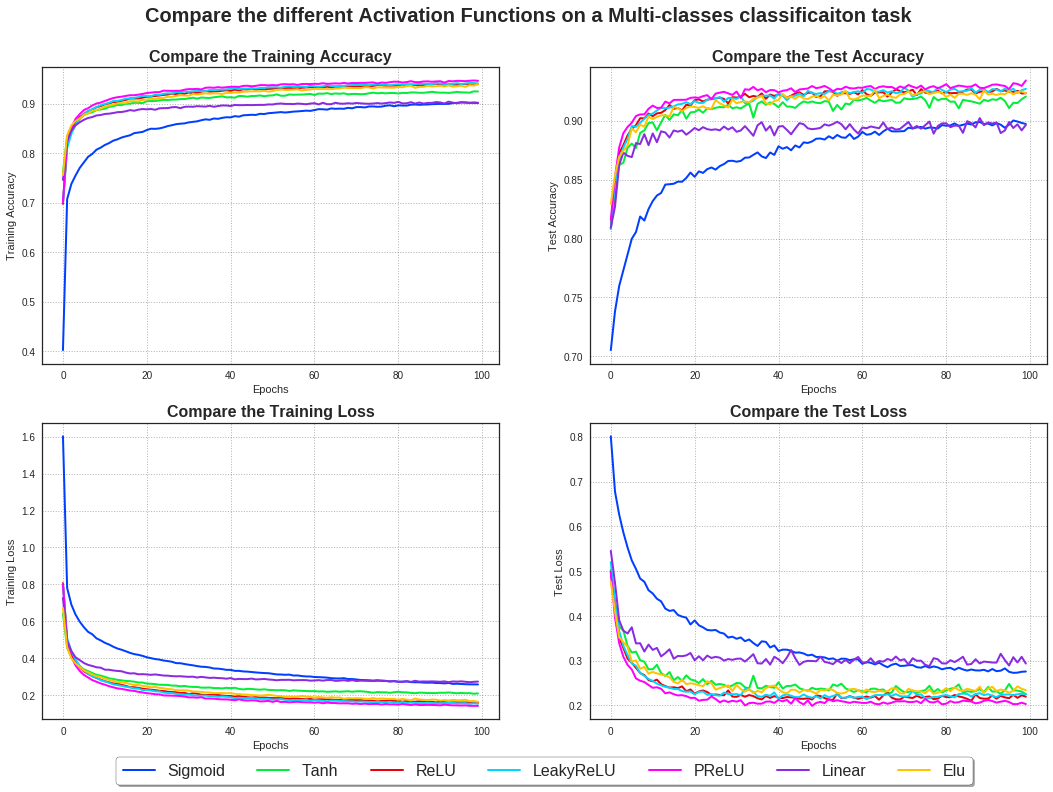

In [30]:
plt.style.use('seaborn-white')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(18,12))
ax1.plot(model_1_history.history['acc'],color=colors[0],linewidth=2,label='Sigmoid')
ax1.plot(model_2_history.history['acc'],color=colors[1],linewidth=2,label='Tanh')
ax1.plot(model_3_history.history['acc'],color=colors[2],linewidth=2,label='ReLU')
ax1.plot(model_4_history.history['acc'],color=colors[5],linewidth=2,label='LeakyReLU')
ax1.plot(model_5_history.history['acc'],color='fuchsia',linewidth=2,label='PReLU')
ax1.plot(model_6_history.history['acc'],color=colors[3],linewidth=2,label='Linear')
ax1.plot(model_7_history.history['acc'],color=colors[4],linewidth=2,label='Elu')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training Accuracy',fontsize=16, fontweight='bold')


ax2.plot(model_1_history.history['val_acc'],color=colors[0],linewidth=2,label='Sigmoid')
ax2.plot(model_2_history.history['val_acc'],color=colors[1],linewidth=2,label='Tanh')
ax2.plot(model_3_history.history['val_acc'],color=colors[2],linewidth=2,label='ReLU')
ax2.plot(model_4_history.history['val_acc'],color=colors[5],linewidth=2,label='LeakyReLU')
ax2.plot(model_5_history.history['val_acc'],color='fuchsia',linewidth=2,label='PReLU')
ax2.plot(model_6_history.history['val_acc'],color=colors[3],linewidth=2,label='Linear')
ax2.plot(model_7_history.history['val_acc'],color=colors[4],linewidth=2,label='Elu')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Test Accuracy')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Test Accuracy',fontsize=16, fontweight='bold')


ax3.plot(model_1_history.history['loss'],color=colors[0],linewidth=2,label='Sigmoid')
ax3.plot(model_2_history.history['loss'],color=colors[1],linewidth=2,label='Tanh')
ax3.plot(model_3_history.history['loss'],color=colors[2],linewidth=2,label='ReLU')
ax3.plot(model_4_history.history['loss'],color=colors[5],linewidth=2,label='LeakyReLU')
ax3.plot(model_5_history.history['loss'],color='fuchsia',linewidth=2,label='PReLU')
ax3.plot(model_6_history.history['loss'],color=colors[3],linewidth=2,label='Linear')
ax3.plot(model_7_history.history['loss'],color=colors[4],linewidth=2,label='Elu')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss')
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss',fontsize=16, fontweight='bold')

ax4.plot(model_1_history.history['val_loss'],color=colors[0],linewidth=2,label='Sigmoid')
ax4.plot(model_2_history.history['val_loss'],color=colors[1],linewidth=2,label='Tanh')
ax4.plot(model_3_history.history['val_loss'],color=colors[2],linewidth=2,label='ReLU')
ax4.plot(model_4_history.history['val_loss'],color=colors[5],linewidth=2,label='LeakyReLU')
ax4.plot(model_5_history.history['val_loss'],color='fuchsia',linewidth=2,label='PReLU')
ax4.plot(model_6_history.history['val_loss'],color=colors[3],linewidth=2,label='Linear')
ax4.plot(model_7_history.history['val_loss'],color=colors[4],linewidth=2,label='Elu')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Test Loss')
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Test Loss',fontsize=16, fontweight='bold')

plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.1),
          ncol=7, fancybox=True, shadow=True, frameon=True,edgecolor='black',fontsize=16)

fig.suptitle('Compare the different Activation Functions on a Multi-classes classificaiton task',fontsize=20, fontweight='bold',y=0.95)
plt.show()
